In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import datawig
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt

### Load training data

In [2]:
df = pd.read_csv('train.csv', sep=';')
df.sample(10)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
30423,15/9-15,2343.304000,436806.46875,6463010.5,-2318.007324,ROGALAND GP.,Lista Fm.,14.882113,0.771240,0.771240,...,12.761565,NaN,2.632109,0.115312,0.143792,NaN,NaN,0.570850,65000,1.0
1073159,35/3-7 S,3582.467851,543919.75000,6856653.5,-3477.858154,CROMER KNOLL GP.,Roedby Fm.,8.645628,NaN,5.599961,...,10.556081,150.206314,NaN,-0.007215,NaN,6.627153,10.410796,NaN,65000,1.0
436368,25/9-1,734.814000,483545.34375,6590313.0,-709.762207,NORDLAND GP.,Utsira Fm.,NaN,NaN,NaN,...,109.271744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65030,1.0
290688,25/3-1,1075.968000,487291.25000,6643945.0,-1053.937988,HORDALAND GP.,NaN,17.646826,NaN,0.867609,...,7.970956,NaN,0.215513,0.051340,0.958611,NaN,NaN,NaN,30000,1.0
1118085,35/9-10 S,3580.061600,537897.75000,6791142.5,-3069.179688,BAAT GP.,Rannoch Fm.,8.572706,NaN,7.634528,...,31.773550,140.671463,NaN,0.039784,NaN,NaN,NaN,NaN,65000,1.0
564809,31/2-7,543.912932,524586.50000,6747128.5,-518.902283,NORDLAND GP.,NaN,17.800201,NaN,2.290902,...,NaN,NaN,NaN,0.005903,NaN,NaN,NaN,NaN,65000,1.0
745628,33/9-17,2600.577985,438440.25000,6814142.5,-2573.349854,SHETLAND GP.,Kyrre Fm.,8.527467,1.440498,1.394500,...,NaN,NaN,NaN,-0.004298,NaN,NaN,6.810722,2.037278,65000,1.0
531364,30/6-5,2325.034400,497435.71875,6728314.0,-2299.976318,SHETLAND GP.,Lista Fm.,14.654340,1.958396,1.847564,...,NaN,NaN,NaN,0.000692,NaN,NaN,NaN,2.087825,70000,1.0
936673,34/8-1,2787.793023,469565.43750,6803862.0,-2746.412354,BAAT GP.,Tarbert Fm.,8.000000,1.489495,54.155262,...,NaN,NaN,NaN,-0.066900,NaN,NaN,NaN,1.821454,30000,1.0
144292,16/4-1,1058.201604,449949.31250,6500257.0,-1033.074951,HORDALAND GP.,Utsira Fm.,16.719784,1.197158,1.202889,...,1.831535,NaN,1.969784,-0.004111,0.140197,NaN,NaN,NaN,65000,1.0


In [3]:
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [5]:
df['FORCE_2020_LITHOFACIES_LITHOLOGY'].nunique()

12

In [3]:
df.WELL.unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-1',
       '25/5-4', '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S',
       '25/8-7', '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S',
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-19', '34/10-21', '34/10-33',
       '34/10-35', '34/11-1', '34/11-2 S', '34/12-1', '34/2-4',
       '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13',
       '34/7-20', '34/7-21', '34/8-1', '34/8-3', '34/8-7 R', '35/11-1',
       '35/11-10', '35/11-11', '35/11-12

In [4]:
df.shape

(1170511, 29)

In [5]:
df = df.sample(1000, random_state=1)

# One-hot-encoding

In [6]:
dummies = pd.get_dummies(df[['GROUP', 'FORMATION']], drop_first=True)
df = pd.concat([df.drop(['GROUP', 'FORMATION'], axis=1), dummies], axis=1)

# Split the data

In [7]:
X = df.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL'], axis=1)
y = df['FORCE_2020_LITHOFACIES_LITHOLOGY']

# Mapping
lithology_numbers = {30000: 0,
                     65030: 1,
                     65000: 2,
                     80000: 3,
                     74000: 4,
                     70000: 5,
                     70032: 6,
                     88000: 7,
                     86000: 8,
                     99000: 9,
                     90000: 10,
                     93000: 11}
y = y.map(lithology_numbers)
X_train_init, X_test_init, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_init)
X_test = scaler.transform(X_test_init)
X_train = pd.DataFrame(X_train, columns=X.columns) 
X_test = pd.DataFrame(X_test, columns=X.columns) 

In [9]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train_init)
X_test_minmax = minmax_scaler.transform(X_test_init)
X_train_minmax = pd.DataFrame(X_train_minmax, columns=X.columns) 
X_test_minmax = pd.DataFrame(X_test_minmax, columns=X.columns) 

# Impute missing data

In [10]:
imputer = IterativeImputer(random_state=0)
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns) 

C:\Users\mathe\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:637: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\mathe\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:637: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [11]:
imputer = IterativeImputer(random_state=0)
X_train_minmax = imputer.fit_transform(X_train_minmax)
X_test_minmax = imputer.fit_transform(X_test_minmax)
X_train_minmax = pd.DataFrame(X_train, columns=X.columns)
X_test_minmax = pd.DataFrame(X_test, columns=X.columns) 

C:\Users\mathe\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:637: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\mathe\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:637: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [12]:
X_train_init.sample(5)

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,FORMATION_Sognefjord Fm.,FORMATION_Sola Fm.,FORMATION_Statfjord Fm.,FORMATION_Svarte Fm.,FORMATION_Tarbert Fm.,FORMATION_Tor Fm.,FORMATION_Tryggvason Fm.,FORMATION_Ty Fm.,FORMATION_Utsira Fm.,FORMATION_Vaale Fm.
895599,2517.849000,449505.12500,6808405.0,-2489.141602,12.040892,0.685014,1.636874,0.870555,2.182916,71.222061,...,0,0,0,0,0,0,0,0,0,0
616264,916.448901,536839.50000,6748637.0,-891.413208,NaN,NaN,0.985958,1.047868,2.054809,78.021637,...,0,0,0,0,0,0,0,0,0,0
1069599,2798.102815,551808.43750,6783871.0,-2770.365967,11.889311,1.912257,1.493732,1.815504,2.422944,84.575874,...,0,0,0,0,0,0,0,0,0,0
264637,442.474001,479890.03125,6641111.0,-417.468811,23.143061,0.869333,0.869333,1.153659,1.912060,37.342136,...,0,0,0,0,0,0,0,0,0,0
105340,1870.489201,NaN,NaN,NaN,13.803381,0.818184,NaN,NaN,2.390269,9.234775,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train.sample(5)

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,FORMATION_Sognefjord Fm.,FORMATION_Sola Fm.,FORMATION_Statfjord Fm.,FORMATION_Svarte Fm.,FORMATION_Tarbert Fm.,FORMATION_Tor Fm.,FORMATION_Tryggvason Fm.,FORMATION_Ty Fm.,FORMATION_Utsira Fm.,FORMATION_Vaale Fm.
474,-0.918688,-0.041809,-0.667222,0.929810,-0.227687,-0.143060,-0.080627,-0.103900,-0.849464,-0.421185,...,-0.112509,-0.035377,-0.193942,-0.100504,-0.035377,-0.106668,-0.128524,-0.086929,-0.436436,-0.193942
60,2.263313,-1.161074,0.278535,-2.322163,-1.233706,-0.139837,-0.023622,-0.084632,0.403152,0.106501,...,-0.112509,-0.035377,-0.193942,-0.100504,-0.035377,-0.106668,-0.128524,-0.086929,-0.436436,-0.193942
559,-0.887291,1.908613,0.838090,0.898506,1.435244,-0.136706,-0.070011,-0.096845,-2.373495,0.919559,...,-0.112509,-0.035377,-0.193942,-0.100504,-0.035377,-0.106668,-0.128524,-0.086929,-0.436436,-0.193942
82,0.402922,-0.863240,-0.817181,-0.429906,1.279803,-0.130412,-0.060315,-0.094492,1.106088,-1.139980,...,-0.112509,-0.035377,-0.193942,-0.100504,-0.035377,-0.106668,-0.128524,11.503623,-0.436436,-0.193942
30,-0.834995,1.307212,0.435085,0.854268,0.392371,-0.299601,-0.015770,-0.104418,-0.635331,-0.451917,...,-0.112509,-0.035377,-0.193942,-0.100504,-0.035377,-0.106668,-0.128524,-0.086929,-0.436436,-0.193942


In [14]:
X_train_minmax.sample(5)

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,FORMATION_Sognefjord Fm.,FORMATION_Sola Fm.,FORMATION_Statfjord Fm.,FORMATION_Svarte Fm.,FORMATION_Tarbert Fm.,FORMATION_Tor Fm.,FORMATION_Tryggvason Fm.,FORMATION_Ty Fm.,FORMATION_Utsira Fm.,FORMATION_Vaale Fm.
766,1.185425,1.484713,0.998784,-1.182545,-1.241097,-0.182779,0.089675,-0.028702,1.111293,1.472571,...,-0.112509,-0.035377,-0.193942,-0.100504,-0.035377,-0.106668,-0.128524,-0.086929,-0.436436,-0.193942
70,-1.019720,1.689811,0.347050,1.031611,0.571924,-0.642305,-0.072716,-0.100641,-0.512893,0.524643,...,-0.112509,-0.035377,-0.193942,-0.100504,-0.035377,-0.106668,-0.128524,-0.086929,-0.436436,-0.193942
551,1.974895,0.087695,1.374862,-1.883342,-1.217025,-0.121425,-0.011617,-0.070126,0.955734,0.234405,...,-0.112509,-0.035377,-0.193942,-0.100504,-0.035377,-0.106668,-0.128524,-0.086929,-0.436436,-0.193942
486,0.426475,-1.155560,0.278582,-0.454211,1.085945,-0.036707,-0.062172,-0.097454,0.364001,-0.925855,...,-0.112509,-0.035377,-0.193942,-0.100504,-0.035377,-0.106668,-0.128524,-0.086929,-0.436436,-0.193942
753,0.624091,-1.049113,1.063317,-0.656633,-0.221100,-0.095275,-0.054571,-0.093704,0.923893,1.968516,...,-0.112509,-0.035377,-0.193942,-0.100504,-0.035377,-0.106668,-0.128524,-0.086929,-0.436436,-0.193942


# (Class imbalance?)

# Feature Selection

## Variance Threshold

In [15]:
from sklearn.feature_selection import VarianceThreshold
cols = df.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL'], axis=1).columns
def variance_threshold_selector(X_train, threshold):
    selector = VarianceThreshold(threshold)
    selector.fit(X_train)
    col_names = cols
    col_bools = selector.get_support()
    relevant_cols = [col_name for col_name, col_bool in zip(col_names, col_bools) if col_bool == True]
    irrelevant_cols = [col_name for col_name, col_bool in zip(col_names, col_bools) if col_bool == False]
    df_selected = df[relevant_cols]
    df_removed = df[irrelevant_cols]
    return (df_selected, df_removed)
df_selected, df_removed = variance_threshold_selector(X_train_minmax, 0.01) # Change here 
# 0.0 to remove constant features, 0.01 to remove quasi-contant features

In [16]:
selected_features_var = list(df_selected.columns)
removed_features_var = list(df_removed.columns)

In [17]:
print(removed_features_var)

[]


## Chi-Square Test

In [18]:
from sklearn.feature_selection import chi2
X_train_chi = X_train_init.drop(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP', 
                                 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 
                                 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO'], axis=1)
chi_scores = chi2(X_train_chi, y_train)

In [19]:
X_train_chi

,GROUP_BOKNFJORD GP.,GROUP_CROMER KNOLL GP.,GROUP_DUNLIN GP.,GROUP_HEGRE GP.,GROUP_HORDALAND GP.,GROUP_NORDLAND GP.,GROUP_ROGALAND GP.,GROUP_ROTLIEGENDES GP.,GROUP_SHETLAND GP.,GROUP_VESTLAND GP.,...,FORMATION_Sognefjord Fm.,FORMATION_Sola Fm.,FORMATION_Statfjord Fm.,FORMATION_Svarte Fm.,FORMATION_Tarbert Fm.,FORMATION_Tor Fm.,FORMATION_Tryggvason Fm.,FORMATION_Ty Fm.,FORMATION_Utsira Fm.,FORMATION_Vaale Fm.
662367,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
435285,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248856,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1166688,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
704934,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541786,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
111053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
805124,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


,p-value
FORMATION_Mime Fm.,9.998816e-01
FORMATION_Tarbert Fm.,9.998816e-01
FORMATION_Sola Fm.,9.998816e-01
FORMATION_Skade Mb.,9.979691e-01
FORMATION_Lunde Fm.,9.959579e-01
...,...
FORMATION_Tor Fm.,4.862713e-25
FORMATION_Smith Bank Fm.,4.419562e-40
FORMATION_Balder Fm.,2.161234e-73
GROUP_ZECHSTEIN GP.,1.163884e-100


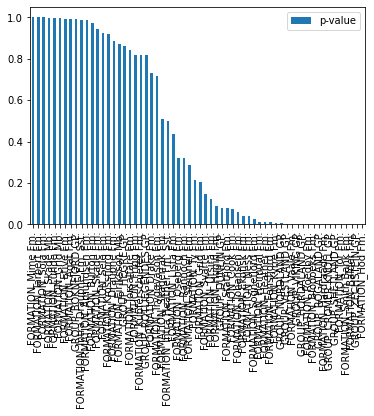

In [20]:
df_p_values = pd.DataFrame({'p-value': chi_scores[1]})
df_p_values.index = df.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 
                             'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP', 
                             'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 
                             'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO'], axis=1).columns
df_p_values.sort_values(by='p-value', ascending=False , inplace=True)
df_p_values.plot.bar()
df_p_values

In [21]:
alpha = 0.05 # Change here
selected_features_chi = list(df_p_values[df_p_values['p-value'] <= alpha].index)
removed_features_chi = list(df_p_values[df_p_values['p-value'] > alpha].index)

In [22]:
print(removed_features_chi)

['FORMATION_Mime Fm.', 'FORMATION_Tarbert Fm.', 'FORMATION_Sola Fm.', 'FORMATION_Skade Mb.', 'FORMATION_Lunde Fm.', 'FORMATION_Grid Mb.', 'FORMATION_Etive Fm.', 'FORMATION_Agat Fm.', 'GROUP_BOKNFJORD GP.', 'FORMATION_Intra Draupne Fm. Sst.', 'FORMATION_Amundsen Fm.', 'FORMATION_Burton Fm.', 'FORMATION_Skade Fm.', 'FORMATION_Sele Fm.', 'FORMATION_Krossfjord Fm.', 'FORMATION_Draupne Fm.', 'FORMATION_Eiriksson Mb.', 'GROUP_HEGRE GP.', 'FORMATION_Jorsalfare Fm.', 'FORMATION_Frigg Fm.', 'FORMATION_Kupferschiefer Fm.', 'GROUP_ROTLIEGENDES GP.', 'FORMATION_Drake Fm.', 'FORMATION_Tryggvason Fm.', 'FORMATION_Skagerrak Fm.', 'FORMATION_Intra Heather Fm. Sst.', 'FORMATION_Lista Fm.', 'FORMATION_Oseberg Fm.', 'FORMATION_Rannoch Fm.', 'FORMATION_Sleipner Fm.', 'FORMATION_Ty Fm.', 'FORMATION_Grid Fm.', 'FORMATION_Svarte Fm.', 'FORMATION_Utsira Fm.', 'FORMATION_Hugin Fm.', 'GROUP_DUNLIN GP.', 'FORMATION_Statfjord Fm.', 'FORMATION_Cook Fm.', 'FORMATION_Johansen Fm.']


## Correlation Threshold

2021-04-21 19:39:30,226 [INFO]  NumExpr defaulting to 4 threads.


<AxesSubplot:>

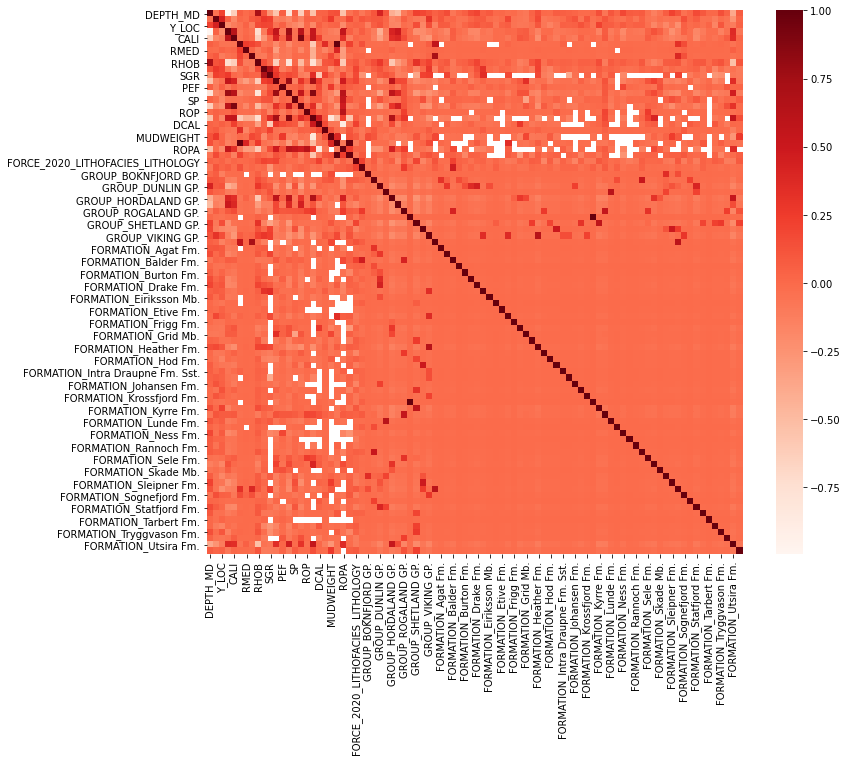

In [23]:
plt.figure(figsize=(12, 10))
cor = df.corr()
sns.heatmap(cor, annot=False, cmap='Reds')

In [24]:
cor_y = abs(cor['FORCE_2020_LITHOFACIES_LITHOLOGY'])
selected_features_cor = cor_y[cor_y > 0.15] # Change here
df_selected = df[selected_features_cor.index]

<AxesSubplot:>

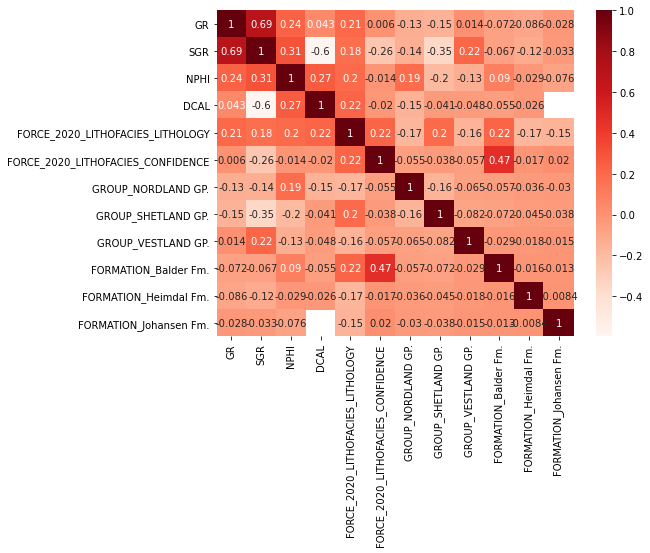

In [25]:
plt.figure(figsize=(8, 6))
cor = df_selected.corr()
sns.heatmap(cor, annot=True, cmap='Reds')

In [26]:
selected_features_cor = list(df_selected.columns)
removed_features_cor = list(set(df.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1).columns) - set(selected_features_cor))

In [27]:
print(removed_features_cor)

['FORMATION_Krossfjord Fm.', 'GROUP_DUNLIN GP.', 'FORMATION_Ekofisk Fm.', 'FORMATION_Sleipner Fm.', 'FORMATION_Drake Fm.', 'GROUP_BOKNFJORD GP.', 'DRHO', 'FORMATION_Ty Fm.', 'FORMATION_Hugin Fm.', 'WELL', 'FORMATION_Frigg Fm.', 'FORMATION_Blodoeks Fm.', 'FORMATION_Burton Fm.', 'X_LOC', 'FORMATION_Fensfjord Fm.', 'FORMATION_Vaale Fm.', 'FORMATION_Cook Fm.', 'FORMATION_Sele Fm.', 'FORMATION_Statfjord Fm.', 'FORMATION_Sola Fm.', 'FORMATION_Skagerrak Fm.', 'FORMATION_Agat Fm.', 'BS', 'FORMATION_Sognefjord Fm.', 'FORMATION_Smith Bank Fm.', 'DTS', 'FORMATION_Ness Fm.', 'FORMATION_Grid Mb.', 'FORMATION_Hod Fm.', 'PEF', 'ROPA', 'FORMATION_Oseberg Fm.', 'FORMATION_Eiriksson Mb.', 'FORMATION_Roedby Fm.', 'FORMATION_Svarte Fm.', 'FORMATION_Lista Fm.', 'RHOB', 'FORMATION_Jorsalfare Fm.', 'RMIC', 'GROUP_CROMER KNOLL GP.', 'FORMATION_Tor Fm.', 'GROUP_HORDALAND GP.', 'RSHA', 'FORMATION_Intra Draupne Fm. Sst.', 'RXO', 'FORMATION_Intra Heather Fm. Sst.', 'GROUP_ROTLIEGENDES GP.', 'GROUP_ZECHSTEIN GP.',

## Backward Elimination

In [28]:
import statsmodels.api as sm
feat_cols = list(X_train.columns)
pmax = 1
while (len(feat_cols) > 0):
    p = []
    const_col = X_train[feat_cols]
    const_col = sm.add_constant(const_col)
    model = sm.OLS(y_train.values, const_col).fit()
    p = pd.Series(model.pvalues[1:], index=feat_cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax > 0.05): # Change here
        feat_cols.remove(feature_with_p_max)
    else:
        break

C:\Users\mathe\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\mathe\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\mathe\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\mathe\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\mathe\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is dep

In [29]:
selected_features_back = list(feat_cols)
removed_features_back = list(set(df.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1).columns) - set(feat_cols))

In [30]:
removed_features_back

['GROUP_BOKNFJORD GP.',
 'FORMATION_Kupferschiefer Fm.',
 'FORMATION_Etive Fm.',
 'FORMATION_Oseberg Fm.',
 'SGR',
 'WELL',
 'FORMATION_Frigg Fm.',
 'FORMATION_Ekofisk Fm.',
 'FORMATION_Rannoch Fm.',
 'FORMATION_Skade Mb.',
 'FORMATION_Sola Fm.',
 'FORMATION_Mime Fm.',
 'FORMATION_Tarbert Fm.',
 'GROUP_ROTLIEGENDES GP.',
 'FORCE_2020_LITHOFACIES_CONFIDENCE']

## Recursive Feature Elimination

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.svm import SVR # Has to use linear kernel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

high_score = 0
optimal_n = 0
ns = np.arange(1, df.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL'], axis=1).shape[1] + 1)
score_list = []
for n in ns:
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
    model = DecisionTreeClassifier() # Change here
    rfe = RFE(model, n_features_to_select = n)
    X_train_rfe = rfe.fit_transform(X_train_temp, y_train_temp)
    X_test_rfe = rfe.transform(X_test_temp)
    model.fit(X_train_rfe, y_train_temp)
    score = model.score(X_test_rfe, y_test_temp)
    score_list.append(score)
    if(score > high_score):
        high_score = score
        optimal_n = n

In [32]:
print("Possible optimum number of features: %d" %optimal_n)
print("Score with %d features: %f" %(optimal_n, high_score))
df_selected = pd.DataFrame({'Score': score_list})
df_selected.index = range(1, len(df_selected) + 1) # Number of Features
df_selected.sort_values(by='Score')

Possible optimum number of features: 15
Score with 15 features: 0.737500


,Score
1,0.454167
3,0.587500
2,0.595833
4,0.633333
5,0.662500
...,...
21,0.716667
9,0.720833
18,0.729167
19,0.733333


In [33]:
cols = list(df.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL'], axis=1))
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=optimal_n)      
X_rfe = rfe.fit_transform(X_train, y_train)
model.fit(X_rfe, y_train)              
temp = pd.Series(rfe.support_, index = cols)

In [34]:
selected_features_rfe = list(temp[temp == True].index)
removed_features_rfe = list(temp[temp == False].index)

In [35]:
print(removed_features_rfe)

['DEPTH_MD', 'RDEP', 'SGR', 'PEF', 'SP', 'BS', 'ROP', 'DCAL', 'MUDWEIGHT', 'ROPA', 'GROUP_BOKNFJORD GP.', 'GROUP_CROMER KNOLL GP.', 'GROUP_DUNLIN GP.', 'GROUP_HEGRE GP.', 'GROUP_HORDALAND GP.', 'GROUP_NORDLAND GP.', 'GROUP_ROGALAND GP.', 'GROUP_ROTLIEGENDES GP.', 'GROUP_VESTLAND GP.', 'GROUP_VIKING GP.', 'GROUP_ZECHSTEIN GP.', 'FORMATION_Agat Fm.', 'FORMATION_Amundsen Fm.', 'FORMATION_Balder Fm.', 'FORMATION_Blodoeks Fm.', 'FORMATION_Burton Fm.', 'FORMATION_Cook Fm.', 'FORMATION_Drake Fm.', 'FORMATION_Draupne Fm.', 'FORMATION_Eiriksson Mb.', 'FORMATION_Ekofisk Fm.', 'FORMATION_Etive Fm.', 'FORMATION_Fensfjord Fm.', 'FORMATION_Frigg Fm.', 'FORMATION_Grid Fm.', 'FORMATION_Grid Mb.', 'FORMATION_Hardraade Fm.', 'FORMATION_Heather Fm.', 'FORMATION_Heimdal Fm.', 'FORMATION_Hod Fm.', 'FORMATION_Hugin Fm.', 'FORMATION_Intra Draupne Fm. Sst.', 'FORMATION_Intra Heather Fm. Sst.', 'FORMATION_Johansen Fm.', 'FORMATION_Jorsalfare Fm.', 'FORMATION_Krossfjord Fm.', 'FORMATION_Kupferschiefer Fm.', 'FO

## LassoCV

In [36]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_train, y_train)
coef = pd.Series(reg.coef_, index = df.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL'], axis=1).columns)
coef = coef.sort_values()

C:\Users\mathe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25334147965600096, tolerance: 0.14029937500000003
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mathe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2534653946046319, tolerance: 0.14029937500000003
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mathe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14575601830347296, tolerance: 0.14084937500000003
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mathe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent

<AxesSubplot:title={'center':'Feature importance using Lasso Model'}>

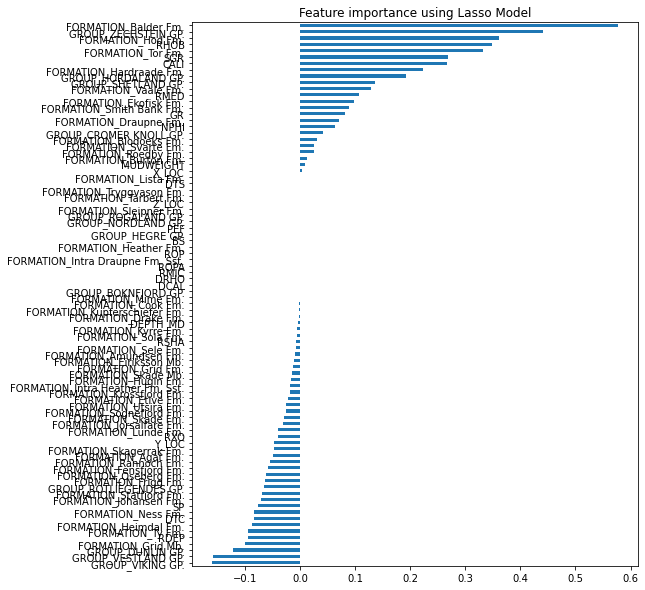

In [37]:
plt.figure(figsize=(8, 10))
plt.title("Feature importance using Lasso Model")
coef.plot(kind = "barh", )

In [38]:
selected_features_lasso = list(coef[coef != 0].index)
removed_features_lasso = list(coef[coef == 0].index)

In [39]:
print(removed_features_lasso)

['DCAL', 'DRHO', 'RMIC', 'ROPA', 'FORMATION_Intra Draupne Fm. Sst.', 'ROP', 'FORMATION_Heather Fm.', 'BS', 'GROUP_HEGRE GP.', 'PEF', 'GROUP_NORDLAND GP.', 'GROUP_ROGALAND GP.', 'FORMATION_Sleipner Fm.', 'Z_LOC', 'FORMATION_Tarbert Fm.', 'FORMATION_Tryggvason Fm.', 'DTS', 'FORMATION_Lista Fm.']


## Putting all feature selections together

In [40]:
def get_true_false(selected_features, features):
    selected_t_f = []
    for feature in features:
        if feature in selected_features:
            selected_t_f.append(True)
        else:
            selected_t_f.append(False)
    return selected_t_f

In [41]:
features = sorted(df.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL'], axis=1).columns)
df_selections = pd.DataFrame({'Feature': features,
                              'Variance': get_true_false(selected_features_var, features),
                              'Chi-Squared': get_true_false(selected_features_chi, features),
                              'Correlation': get_true_false(selected_features_cor, features),
                              'Backward': get_true_false(selected_features_back, features),
                              'RFE': get_true_false(selected_features_rfe, features),
                              'Lasso': get_true_false(selected_features_lasso, features)})
df_selections['Total'] = np.sum(df_selections, axis=1)
df_selections = df_selections.sort_values(['Total', 'Feature'], ascending=False)
df_selections.index = range(1, len(df_selections) + 1)
df_selections

,Feature,Variance,Chi-Squared,Correlation,Backward,RFE,Lasso,Total
1,GROUP_SHETLAND GP.,True,True,True,True,True,True,6
2,NPHI,True,False,True,True,True,True,5
3,GROUP_VESTLAND GP.,True,True,True,True,False,True,5
4,GR,True,False,True,True,True,True,5
5,FORMATION_Heimdal Fm.,True,True,True,True,False,True,5
...,...,...,...,...,...,...,...,...
82,FORMATION_Intra Draupne Fm. Sst.,True,False,False,True,False,False,2
83,FORMATION_Frigg Fm.,True,False,False,False,False,True,2
84,FORMATION_Etive Fm.,True,False,False,False,False,True,2
85,BS,True,False,False,True,False,False,2


In [42]:
votes = 3
final_selected = list(df_selections[df_selections['Total'] > votes]['Feature']) # Change votes threshold

In [43]:
final_selected

['GROUP_SHETLAND GP.',
 'NPHI',
 'GROUP_VESTLAND GP.',
 'GR',
 'FORMATION_Heimdal Fm.',
 'FORMATION_Balder Fm.',
 'Y_LOC',
 'X_LOC',
 'RXO',
 'RSHA',
 'RMED',
 'RHOB',
 'GROUP_ZECHSTEIN GP.',
 'GROUP_VIKING GP.',
 'GROUP_NORDLAND GP.',
 'GROUP_HORDALAND GP.',
 'GROUP_CROMER KNOLL GP.',
 'FORMATION_Vaale Fm.',
 'FORMATION_Tor Fm.',
 'FORMATION_Sognefjord Fm.',
 'FORMATION_Smith Bank Fm.',
 'FORMATION_Roedby Fm.',
 'FORMATION_Ness Fm.',
 'FORMATION_Kyrre Fm.',
 'FORMATION_Johansen Fm.',
 'FORMATION_Hod Fm.',
 'FORMATION_Hardraade Fm.',
 'FORMATION_Fensfjord Fm.',
 'FORMATION_Blodoeks Fm.',
 'DTC',
 'CALI']

### Applying the custom scoring function

Apart from the missing log curves, **one of the key challenges of this machine learning competition is that you are being scored using a custom scoring function**. 

A prediction is scored using the penalty function
$$ S = - \frac{1}{N}\sum_{i=0}^N A_{ \hat{y}_i y_i} $$
where $N$ is the number of samples, $y_i$ is prediction for sample $i$, $\hat{y}_i$ is the true target for sample $i$, and $A$ is the penalty matrix given by the following

In short, the value of the matrix A at row i and column j is the **penalty** given by guessing lithology number i when the correct label is lithology numner j. Notice that the diagonal consists of zeros, no penalty is given for correct predictions.

In [44]:
A = np.load('penalty_matrix.npy')

In [45]:
A

array([[0.   , 2.   , 3.5  , 3.   , 3.75 , 3.5  , 3.5  , 4.   , 4.   ,
        2.5  , 3.875, 3.25 ],
       [2.   , 0.   , 2.375, 2.75 , 4.   , 3.75 , 3.75 , 3.875, 4.   ,
        3.   , 3.75 , 3.   ],
       [3.5  , 2.375, 0.   , 2.   , 3.5  , 3.5  , 3.75 , 4.   , 4.   ,
        2.75 , 3.25 , 3.   ],
       [3.   , 2.75 , 2.   , 0.   , 2.5  , 2.   , 2.25 , 4.   , 4.   ,
        3.375, 3.75 , 3.25 ],
       [3.75 , 4.   , 3.5  , 2.5  , 0.   , 2.625, 2.875, 3.75 , 3.25 ,
        3.   , 4.   , 3.625],
       [3.5  , 3.75 , 3.5  , 2.   , 2.625, 0.   , 1.375, 4.   , 3.75 ,
        3.5  , 4.   , 3.625],
       [3.5  , 3.75 , 3.75 , 2.25 , 2.875, 1.375, 0.   , 4.   , 3.75 ,
        3.125, 4.   , 3.75 ],
       [4.   , 3.875, 4.   , 4.   , 3.75 , 4.   , 4.   , 0.   , 2.75 ,
        3.75 , 3.75 , 4.   ],
       [4.   , 4.   , 4.   , 4.   , 3.25 , 3.75 , 3.75 , 2.75 , 0.   ,
        4.   , 4.   , 3.875],
       [2.5  , 3.   , 2.75 , 3.375, 3.   , 3.5  , 3.125, 3.75 , 4.   ,
        0.   , 2.5  

The scoring function can be implemented as follows. If used as a loss function in a neural network framwork, it is recommended to implement a more efficient function based on tensor products. 

In [46]:
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

**IMPORTANT: The implementation above assumes zero-indexed y_true and y_pred. Be careful not to mix zero-indexed and 1-indexed class labels.**

Let us see what happens when we test the scoring function on some corner cases:

##### Lazily guessing SHALE for everything gives an OK score due to the imbalance of the dataset

In [47]:
score(y_test.values, np.ones(y_test.shape)*2)

-1.030625

##### Doing the same for an uncommon class, like COAL, not so much..

In [48]:
score(y_test.values, np.ones(y_test.shape)*11)

-3.07875

##### Of course getting it completely right gives the highest possible score, 0

In [49]:
score(y_test.values, y_test.values)

0.0

# Format df for RNN

# LSTM Model

## Building the model

In [50]:
import tensorflow as tf

In [51]:
tf.random.normal([32, 10, 8])

<tf.Tensor: shape=(32, 10, 8), dtype=float32, numpy=
array([[[ 4.18935210e-01, -4.87998873e-01, -4.17630821e-01, ...,
          9.01186109e-01, -9.85904157e-01,  7.50994325e-01],
        [-3.86418194e-01,  1.55349982e+00, -1.04347944e+00, ...,
          7.86660194e-01,  1.24301851e+00, -1.24748611e+00],
        [ 1.37499809e+00, -9.88498330e-01, -1.06489182e+00, ...,
          1.11317015e+00,  1.35265231e-01, -1.26917675e-01],
        ...,
        [ 1.47668302e-01, -3.69948804e-01,  3.05413812e-01, ...,
         -1.36496633e-01, -5.82841575e-01, -1.53400242e+00],
        [ 1.90498853e+00, -6.94427788e-01, -4.88362223e-01, ...,
         -7.82474056e-02,  2.25800657e+00,  1.41821969e+00],
        [ 1.01772487e+00, -6.03824496e-01,  1.59466946e+00, ...,
          1.11743164e+00,  1.87835741e+00, -1.06546469e-02]],

       [[ 2.93245816e+00, -4.65081394e-01,  2.77945071e-01, ...,
          1.51601478e-01,  2.66771197e-01, -1.57974288e-01],
        [-3.15789059e-02, -5.93376338e-01, -7.6457

In [52]:
print(f'{X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}')

(800, 86) (200, 86) (800,) (200,)


In [53]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

model = Sequential()

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(y_train.nunique(), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the model

In [54]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Create callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=5), 
             ModelCheckpoint('../models/model.h5',
             save_best_only=True,
             save_weights_only=False)]

In [55]:
history = model.fit(X_train,  y_train, 
                    batch_size=2048, epochs=150,
                    callbacks=callbacks,
                    validation_data=(X_test, y_test))

Epoch 1/150


ValueError: in user code:

    C:\Users\mathe\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\mathe\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\mathe\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\mathe\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\mathe\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\mathe\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\mathe\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\mathe\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\mathe\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 86)


### Example prediction on open test dataset

##### Train an oversimplified dummy model for the sake of the example
In order to give examples of how to submit predictions and reproducible code, we will train a RandomForestClassifier on the full feature set where we lazily have set all missing values (NaNs) to zero. This is an example only, following along this approach for the competition is not recommended. However, the template below can be used for generating predictions for the weekly leaderboard from your own model, and as an example on how to ecapsulate your model for final scoring where you have to submit code.

Apart from the inherent flaws of the random forest classifier, this example approach has a number of issues and simplifications. For example:
* Data is not separated per well. Normalization and shuffling is done across the whole dataset.
* The penatly matrix is not taken into account, it is treated as a normal classification problem.
* Missing logs are treated as zeros
* Depth and formation tops not taken into account
* Same model is used for when you only have gamma ray logs as when you have the full set of logs

In [ ]:
model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')

In [ ]:
model.fit(X_train, y_train)

#### Test model

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
score(y_test.values, y_pred_test)

##### Save model and scaler to files

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In order to make it easy to run inference on new data, such as the open test dataset, it is recommended to wrap the initialization of the model, all preprocessing steps including normalization, treatment of NaNs and removals of unused columns in a class or pipeline. There are many ways of doing this, one example being a class like below:

In [ ]:
class Model(object):
    def __init__(self, model_file, scaler_file):
        # Load pre-trained model from file
        self.model = pickle.load(open(model_file, 'rb'))
        # Load a "pre-trained" scaler from file
        self.scaler = pickle.load(open(scaler_file, 'rb'))
        
    def _preprocess(self, features):
        # Method to be run before inference. Contains things like
        # stripping unwanted columns, replacing NaNs, and scaling 
        # or normalizing data
        features.fillna(0, inplace=True)
        features = features[['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS']]
        return self.scaler.transform(features)
        
    def predict(self, features):
        # This function should be able to take in features in their
        # raw, unprocessed form as read from the file test.csv and
        # return predictions as an array integers of the same length
        X = self._preprocess(features)
        return self.model.predict(X)

The model can then be initialized using persisted data in the form of saved model file (or models files), scaler files, and other persisted data.  

In [ ]:
model = Model('model.pkl', 'scaler.pkl')

##### Example submission: weekly leaderboard
For the weekly leaderboard that will start September 1st, you are asked to submit predictions on the supplied open dataset in the file `test.csv`. This file contains all the columns that are in the training data except LITHOLOGY and LITHOLOGY_CONFIDENCE. Notice that the test data will also have missing columns. It is therefore important that your inference pipeline has the treatment of these missing columns as part of the pre-processing step.

In [ ]:
open_test_features = pd.read_csv('hidden_test.csv', sep=';')

In [ ]:
open_test_features.head()

In [ ]:
open_test_features.columns

In [ ]:
test_prediction = model.predict(open_test_features)

In [ ]:
test_prediction

**Important:** Before submitting we must map these predictions back to the lithology labels

In [ ]:
category_to_lithology = {y:x for x,y in lithology_numbers.items()}

In [ ]:
test_prediction_for_submission = np.vectorize(category_to_lithology.get)(test_prediction)

For submission to the weekly leaderboard, write the predictions as a csv file
- single column (no index column or similar)
- header: 'lithology'
- exactly the same number of rows as the raw test features
- use the original lithology labels, 65000, 30000, ..., NOT the encoded ones 0, 1, 2, ...

Example:
```
# lithology
65000
65000
30000
30000
30000
30000
30000
65030
65030
65030
.
.
.
```

In [ ]:
test_prediction_for_submission

In [ ]:
np.savetxt('test_predictions.csv', test_prediction_for_submission, header='lithology', fmt='%i')

### Submitting code for final scoring
At the end of the competition, the highest performing teams are invited to submit code for blind scoring on a hidden test dataset. The winner will be the team with the best score on the hidden test dataset, not the weekly leaderboard. In order to do this, you must submit the following in a zip-file:
* Code to do the inference
* Any persisted data in the form of pre-trained model or models, scalers, and more
* Information about your environment

There are many ways of doing this. In the example above, the code to do the inference would be the `Model` class in a python-file, the persisted data would be the files `model.pkl` and `scaler.pkl`. 

Your python environment needs to be replicable by the judges of the competition. There are many ways of doing this. Examples include dumping pip package versions to a file

In [ ]:
!pip freeze > requirements.txt

If you are using Anaconda, then you can export an envionment file as follows

In [ ]:
!conda env export > environment.yml

Other options include `Docker`, `pipenv` and many more.